In [1]:
from doppler import DopplerRadar
from doppler import Runoff, DopplerJoyPlot, DopplerSensitivityAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import pylab as plot
%matplotlib inline 


In [16]:
df=pd.read_excel('WeatherDataALL.xlsx', sheet_name='Doppler')[['DopplerGauge','DopplerRadar']]

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [22]:
scaler.fit(df)
scaled=scaler.transform(df)

In [23]:
df=pd.DataFrame(scaled,columns=df.columns)

In [24]:
df.head()

,DopplerGauge,DopplerRadar
0,-0.815835,-0.921143
1,-0.303876,-0.921076
2,-0.478617,-0.921062
3,-0.778577,-0.921059
4,-0.337269,-0.921028


In [25]:
doppler=DopplerRadar(data_frame=df, drep_readings=[-0.3,0.1,0.4,0.75, 1,1.4,1.9,2.1,2.3,2.65,3,3.25,3.8], number_samples=int(50), intv_width=0.125)

# sample_drep_dict, sample_gep_lst=doppler.sample_drep_gep()

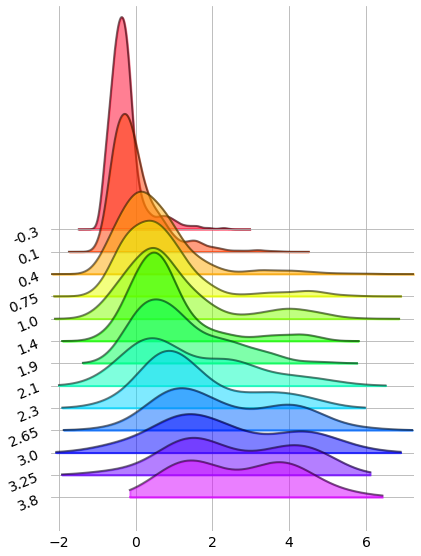

In [26]:
joyplot=DopplerJoyPlot(data_frame=df,drep_readings=[-0.3,0.1,0.4,0.75, 1,1.4,1.9,2.1,2.3,2.65,3,3.25,3.8],figsize=(6,8), intv_width=0.125)

joyplot.display_joy_plot()
plt.show()

In [27]:
df_percent,per85,per50,per25=doppler.get_percentiles()

df_percent

,-0.3,0.1,0.4,0.75,1.0,1.4,1.9,2.1,2.3,2.65,3.0,3.25,3.8
25th Percentile,-0.605053,-0.340020,-0.415537,0.055511,0.077817,0.281401,0.184961,0.168740,0.406329,1.156104,1.360337,1.096289,1.347224
50th Percentile,-0.372455,-0.040362,0.247746,0.533269,0.612201,0.673280,0.721720,0.751715,1.224619,2.591900,2.758419,3.018263,3.139086
85th Percentile,-0.022647,1.165202,1.549300,1.320162,1.986405,1.533167,2.260330,2.598354,2.593468,4.598820,4.674787,5.042702,4.317823


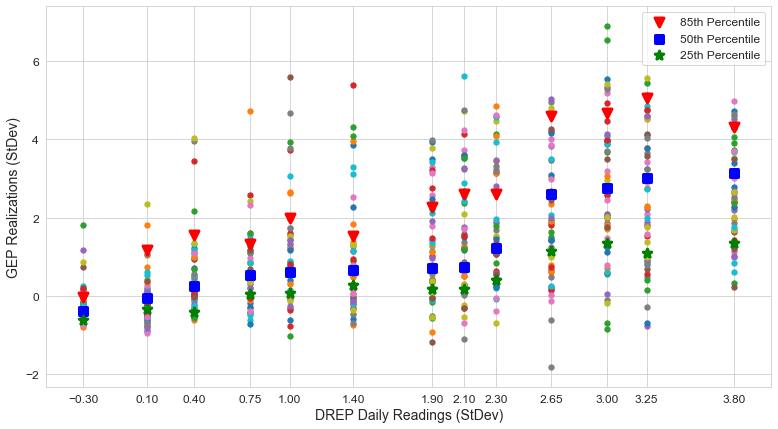

In [28]:
sns.set_style('whitegrid')
doppler.plot_percentiles(per25=per25,per50=per50,per85=per85,figsize=(13,7),s=80,lw=3,xlabel_fontsize=14,
                         legend_fontsize=12, gep_markersize=28,marker_25='*',color_25='g', marker_85='v')
plt.tick_params(labelsize=12)
plt.savefig("GEP_85_50_25_percentile_50.png")

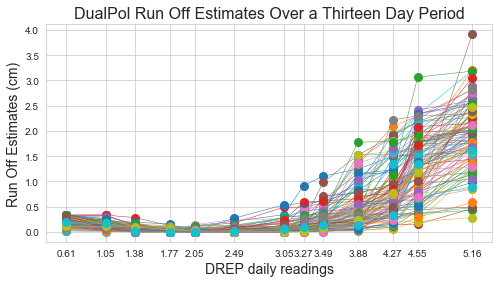

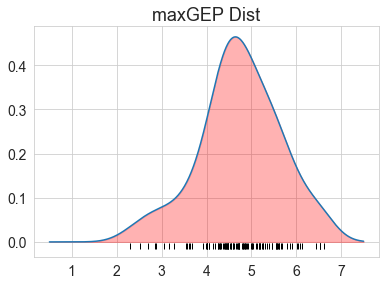

In [29]:
runoff=Runoff(data_frame=df,number_samples=100)

#P,Q=runoff.compute_runoff()

runoff.plot_runoff(x_axis=8,y_axis=4,title_fontsize=16, xlabel='DREP daily readings')
plt.show()

runoff.plot_maxGEP_Dist(domain=np.linspace(.5,7.5,1000), figsize=(6,4),title='maxGEP Dist', title_fontsize=18)
plt.show()

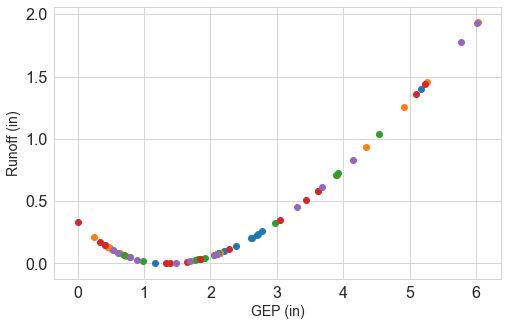

In [30]:
runoff.plot_RunoffvsGEP(figsize=(8,5), tick_param_size=16, xlabel_size=14, N=5)

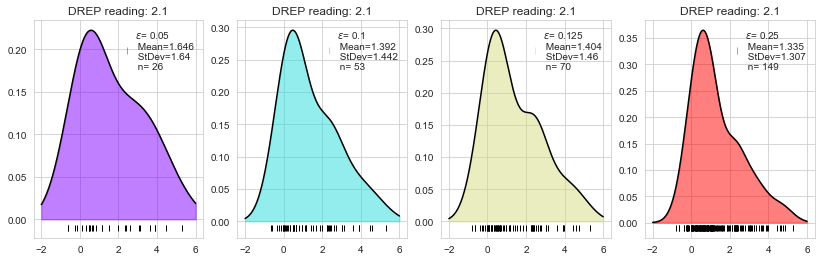

In [34]:

doppler=DopplerSensitivityAnalysis(data_frame=df)
doppler.plot_GepDist_DiscScale(figsize=(14,4), drep_pt=2.1,x_d=np.linspace(-2,6,1000),legend_fontsize=10, legend_handle_length=0.01)


In [35]:
import numpy.linalg as la

In [36]:
A=np.array([[2,1,0],[1,2,1],[0,1,2]])

In [37]:
B=np.array([[3/4,-1/2,1/4],[-1/2,1,-1/2],[1/4,-1/2,3/4]])

In [39]:
np.matmul(A,B)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])